In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
path='DatosAA.csv'
dataset=pd.read_csv(path, header=0)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
val=dataset['Patient age'].replace({'unknown':'30','1 day':'30'})
val=pd.to_numeric(val)
dataset['Patient age']=val
#dataset['Patient age']

In [4]:
#dataset=dataset.fillna(method='ffill')
dataset['Collection date']=pd.to_datetime(dataset['Collection date'],errors='coerce')
#dataset['Patient age']=dataset['Patient age'].map({'unknown':'30','1 day':'30'})
#dataset['Patient age']=pd.to_numeric(dataset['Patient age'])

dataset['Patient status']=dataset['Patient status'].map({'Live':'A',
                            'Outpatient':'A',
                            'Outpatient - Home Monitoring':'A',
                            'Hospitalized - Non-Serious Case':'A',
                            'Live, symptomatic':'A',
                            'Ambulatory':'A',
                            'Ambulatory - Under Treatment':'A',
                            'HOSPITALIZADO':'H',
                            'Hospitalized':'H',
                            'Hospitalized - Serious Case':'H',
                            'Released':'H',
                            'Decease':'D',
                            'Deceased':'D',
                            'Nasal swab':'unknown',
                            'unknown':'unknown',
                            'nan' : 'unknown'
                           })
dataset['Gender']=dataset['Gender'].map({'Female':'M',
                            'HOMBRE':'H',
                            'Male':'H',
                            'unknown':'U',
                           })

In [5]:
filt= dataset['Patient status']=='unknown'
dataset=dataset.drop(index=dataset[filt].index)
#dataset

In [6]:
dataset=dataset.dropna(subset=['Patient status'])

In [7]:
y = dataset.iloc[:, 8]
x = pd.concat([dataset.iloc[:,[6,7,10,11]],dataset.iloc[:,range(13,6973)]], axis=1)
z=pd.concat([dataset.iloc[:,[8,6,7,10,11]],dataset.iloc[:,range(13,6973)]], axis=1)
z

,Patient status,Gender,Patient age,Lineage,Clade,NSP3_I335V,NSP3_E158D,NSP2_I515V,NSP4_T204I,NSP13_R212Q,...,NSP15_P270T,N_S197L,NS7a_V93A,NSP3_E1231K,Spike_S256P,NSP3_E197del,NS8_P36S,E_S55F,NSP16_K277R,NSP14_A371D
35,D,H,32,B.1.609,O,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,D,M,25,B.1,O,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,A,M,48,B.1.1.519,GR,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,A,M,47,B.1.2,GH,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,A,M,19,B.1.429,GH,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,H,H,44,B.1.1,GR,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8512,H,H,56,B.1.1.222,GR,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8513,D,M,61,B.1.609,G,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8514,H,H,26,B.1.609,G,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
ohe= OneHotEncoder(sparse=False)
columns_transx= make_column_transformer(
    (OneHotEncoder(),['Gender','Lineage','Clade']),
    remainder='passthrough',
)

#y=ohe.fit_transform(y.values)
x=columns_transx.fit_transform(x)
x

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [9]:
y=ohe.fit_transform(pd.DataFrame(dataset['Patient status']))


In [10]:
ohe.categories_

[array(['A', 'D', 'H'], dtype=object)]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 360)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)
y_pred  = classifier.predict(X_test)
classifier.score(X_train, y_train)


0.9435114503816794

In [14]:
classifier.score(X_test, y_test)

0.6216628527841342

In [15]:
len(y_test)

1311

In [16]:
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[243,   3, 209],
       [ 19,  12,  41],
       [200,  11, 573]], dtype=int64)

In [17]:
from sklearn import tree
classifiertree= tree.DecisionTreeClassifier(max_depth=20)
classifiertree.fit(X_train, y_train)
y_predtree=classifiertree.predict(X_train)
classifiertree.score(X_test, y_test)


0.6247139588100686

In [18]:
classifiertree.score(X_train, y_train)

0.7997455470737913

In [19]:
cm = confusion_matrix(y_train.argmax(axis=1), y_predtree.argmax(axis=1))
cm

array([[ 885,    0,  463],
       [   4,   78,  107],
       [ 192,    2, 2199]], dtype=int64)

In [20]:
#plt.figure(figsize= (15,10))
#plt.plot(classifiertree.estima, filled=True)

In [21]:
#from sklearn import ensemble
#classifierGB=ensemble.GradientBoostingClassifier(n_estimators=40)
#classifierGB.fit(X_train, y_train)
#y_predGB=classifiertree.predict(X_test)
#classifierGB.score(X_test, y_test)

In [22]:
#from sklearn.naive_bayes import GaussianNB
#classifierGNB = GaussianNB()
#classifierGNB.fit(X_train, y_train)
#y_pred  = classifierGNB.predict(X_test)
#classifierGNB.score(X_test, y_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifierKN = KNeighborsClassifier(n_neighbors=3, leaf_size=50 )
classifierKN.fit(X_train, y_train)
y_predKN  = classifierKN.predict(X_test)
classifierKN.score(X_test, y_test)

0.5430968726163234

In [37]:
classifierKN.score(X_train, y_train)

0.7648854961832061

In [38]:
cm = confusion_matrix(y_test.argmax(axis=1), y_predKN.argmax(axis=1))
cm

array([[ 957,   11,  380],
       [  73,   55,   61],
       [ 310,   23, 2060]], dtype=int64)

In [26]:
#from sklearn.linear_model import LogisticRegression
#classifierLG = LogisticRegression()
#classifierLG.fit(X_train, y_train)
#y_predKN  = classifierLG.predict(X_test)
#classifierLG.score(X_test, y_test)

In [27]:
#from sklearn.svm import SVC
#classifierSVC = SVC(probability= True , kernel= 'linear')
#classifierSVC.fit(X_train, y_train)
#y_predKN  = classifierSVC.predict(X_test)
#classifierSVC.score(X_test, y_test)

In [28]:
#prediccion de probabilidades
r_probs = [0 for _ in range(len(y_test))]
RF_probs=classifier.predict_proba(X_test)
Tree_probs=classifiertree.predict_proba(X_test)
KN_probs=classifierKN.predict_proba(X_test)

In [29]:
#prediccion de probabilidades positivas
#r_probs = r_probs[:,1]
#RF_probs=RF_probs[:,1]
#Tree_probs=Tree_probs[:,1]
#KN_probs=KN_probs[:,1]

In [30]:
#calculo de curva
#from sklearn.metrics import roc_curve, roc_auc_score
#r_auc= roc_auc_score(y_test,r_probs)
#RF_auc= roc_auc_score(y_test,RF_probs)
#Tree_auc= roc_auc_score(y_test,Tree_probs)
#KN_auc= roc_auc_score(y_test,KN_probs)

In [31]:
z

,Patient status,Gender,Patient age,Lineage,Clade,NSP3_I335V,NSP3_E158D,NSP2_I515V,NSP4_T204I,NSP13_R212Q,...,NSP15_P270T,N_S197L,NS7a_V93A,NSP3_E1231K,Spike_S256P,NSP3_E197del,NS8_P36S,E_S55F,NSP16_K277R,NSP14_A371D
35,D,H,32,B.1.609,O,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,D,M,25,B.1,O,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,A,M,48,B.1.1.519,GR,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,A,M,47,B.1.2,GH,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,A,M,19,B.1.429,GH,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,H,H,44,B.1.1,GR,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8512,H,H,56,B.1.1.222,GR,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8513,D,M,61,B.1.609,G,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8514,H,H,26,B.1.609,G,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Classifying data into numerical and categorical variables.
import seaborn as sns
data_numerical=z[['Patient age']]
data_categorical=z[['Patient status', 'Gender', 'Lineage', 'Clade']]

Text(0.5, 1.0, 'Edad')

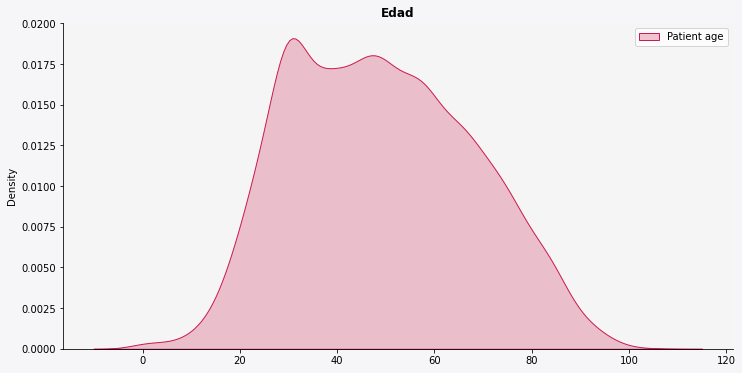

In [33]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(data=data_numerical,shade=True,palette='rocket') # Distributions
# removing spines
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Edad',weight='bold')

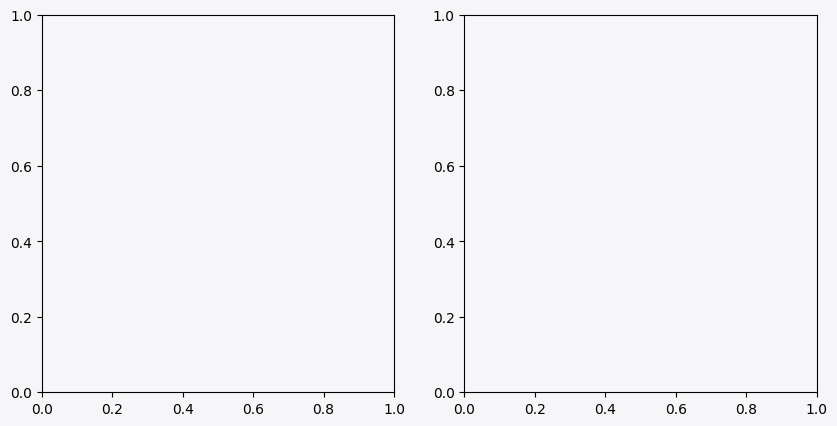

In [34]:
fig=plt.figure(figsize=(10,5),dpi=100)
gs=fig.add_gridspec(1,2)
# adding subplots
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f6f5f7'
# changing background color of our plots
for i in axes:
    i.set_facecolor(background_color)
# changing the figure background color
fig.patch.set_facecolor(background_color) 
# heatmap of numerical data
#corrmat = z.corr()

In [35]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Conjunto de Test)')

plt.legend()
plt.show()

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 7068 features as input.